# Force Optimizations Data Analysis 

In [1]:
from optimization_tools import *
from analysis_tools import *
import matplotlib
import matplotlib.pyplot as plt
import os

## Ensemble of Optimizations

### Initial Optimizations
First, we perform our initial optimizations using the random (educated) guesses for the weights on the objective function. As these optimizations demand significant computational resources, the code is commented out for the purpose of this example. 

In [ ]:
# initial_optimizations()

We next analyze our set of optimizations and parse the data into three DataFrames: `df`, representing the full set of optimizations; `df_filtered`, representing the set of optimizations that passed pre-specified filtering criteria; and `df_pareto1`, representing the set of optimizations on the Pareto front. (This method also exports the Universally Unique Identifiers (unique identifiers for each optimization) of the Pareto front to 
`pareto.txt`). 

In [23]:
df, df_filtered, df_pareto = get_dfs()

Let's take a look at our optimizations!

In [ ]:
pareto_plt(df, df_filtered, df_pareto).show()

### Continuation Method
Now, let us perform the first iteration of our continuation method. Here, we perform the first iteration and allow the maximum variation in any parameter to be a randomly chosen number in the range $10^{-3}$ to $5\times 10^{-2}$. From this point, it is possible to perform the $i+1$-th iteration of the continuation method by using the $i$-th Pareto fronts as input.

In [ ]:
# for i in range(1000): continuation(N=1, dx = 10**rand(-3, -1.3))

If desired, we can also export the Pareto fronts unique folders for easy access. This is helpful for high-performance computing calculations, in which one wishes to reduce the number of files stored on the system.

In [4]:
for folder in os.listdir("./output/"):
    f = os.path.join("./output/", folder)
    if not os.path.isfile(f) and folder == "2":
        get_dfs(INPUT_DIR = f"{folder}/optimizations", OUTPUT_DIR=folder)

Now, let us see how performing the continuation method impacts our Pareto fronts. 

/var/folders/_6/q5y1g_5d74j18s1hfz6jhj2h0000gn/T/ipykernel_30522/2602103025.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  norm = plt.Normalize(1, np.sum(os.path.isdir(os.path.join("./output/", f)) for f in os.listdir("./output/")))


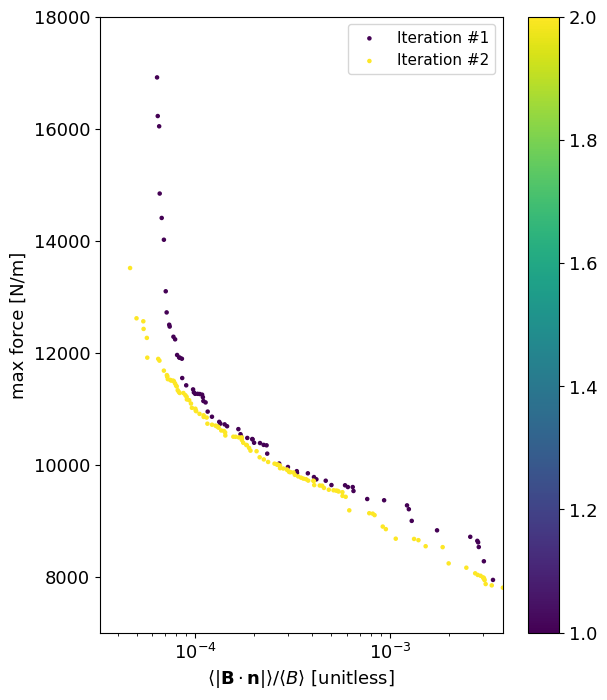

In [3]:
fig = plt.figure(figsize=(6.5, 8))
norm = plt.Normalize(1, np.sum(os.path.isdir(os.path.join("./output/", f)) for f in os.listdir("./output/")))
plt.rc("font", size=13)

for filename in os.listdir("./output/"):
    f = os.path.join("./output/", filename)
    if os.path.isdir(f):
        *_, df = get_dfs(INPUT_DIR = f"{filename}/optimizations")
        plt.scatter(
            df["normalized_BdotN"],
            df["max_max_force"],
            c=int(filename)*np.ones(len(df["UUID"])),
            s=5,
            label=f"Iteration #{filename}",
            norm=norm
        )
        
plt.xlabel(r'$\langle|\mathbf{B}\cdot\mathbf{n}|\rangle/\langle B \rangle$ [unitless]')
plt.ylabel("max force [N/m]")
plt.xlim(0.7 * min(df["normalized_BdotN"]), max(df["normalized_BdotN"]))
plt.ylim(7000, 18000)
plt.xscale("log")
plt.colorbar()
plt.legend(loc='upper right', fontsize='11')
plt.show()

An interesting thing to analyze are the Pearson's R correlations between the maximum force on a coil and other optimization parameters. Interestingly, we see that the strongest correlation by far is with the coil-surface distance. 

In [ ]:
print(parameter_correlations(df_filtered, sort_by="max_max_force").to_markdown())

### Debugging Tools

Here, we create an interactive plot of the Pareto front. This is particularly useful for identifying specific optimizations visually based on their UUID. 

In [25]:
pareto_interactive_plt(df_pareto).show()

We can also analyze the success of our optimizations in terms of how and how much data was excluded during the filtering step. These plots show histograms of the optimizations with regard to numerous parameters, plotted both before and after filtering.

In [ ]:
success_plt(df, df_filtered).show()

## Magnetic Field Analysis

Here, we make Poincare plots of the field.

In [ ]:
for UUID in ['49d67fc2af7e418a95abd1b56613bf03', '13b5e759418c4d29b5b826acc90f5cb9']:
    image = poincare(UUID, OUT_DIR='1/poincare')
    plt.imshow(image)

## Miscellaneous
Let's see what a good `dx` is for the continuation method. Here, we see that $dx\leq 0.1$ seems appropriate.

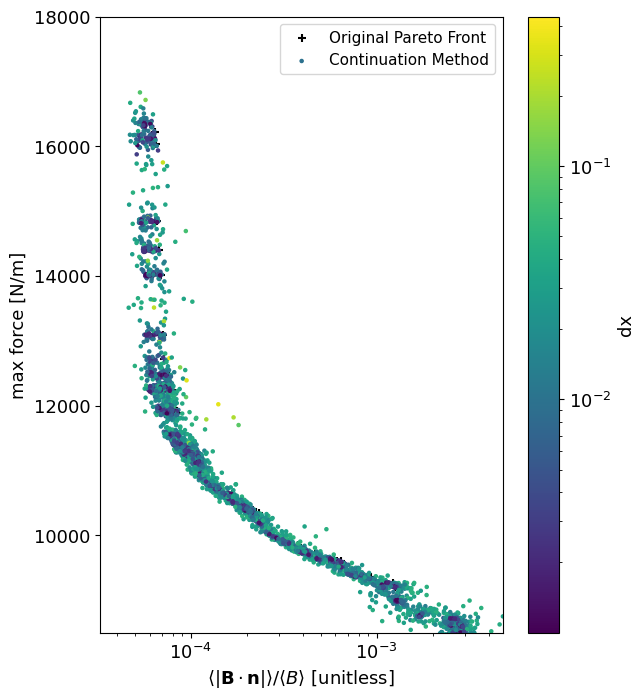

In [6]:
df2, df_filtered2, df_pareto2 = get_dfs(INPUT_DIR='./output/QA/2/optimizations/')

fig = plt.figure(figsize=(6.5, 8))
color = 'dx'
markersize = 5
plt.rc("font", size=13)
norm = matplotlib.colors.LogNorm(min(df_filtered2[color]), max(df_filtered2[color]))

plt.scatter(
    df_pareto["normalized_BdotN"], 
    df_pareto["max_max_force"], 
    marker="+",
    c='black',
    label=f'Original Pareto Front',
)
plt.scatter(
    df_filtered2["normalized_BdotN"],
    df_filtered2["max_max_force"],
    c=df_filtered2[color],
    s=markersize,
    label=f'Continuation Method',
    norm=norm
)
plt.xlabel(r'$\langle|\mathbf{B}\cdot\mathbf{n}|\rangle/\langle B \rangle$ [unitless]')
plt.ylabel("max force [N/m]")
plt.xlim(0.7 * min(df_filtered2["normalized_BdotN"]), max(df_filtered2["normalized_BdotN"]))
plt.ylim(8500, 18000)
plt.xscale("log")
plt.colorbar(label=color)
plt.legend(loc='upper right', fontsize='11')
plt.show()